In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [8]:
mall_data = pd.read_csv('datasets/Mall_Customers.csv')

In [9]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall_data.profile_report()

In [13]:
columns_to_drop = ['CustomerID']

In [14]:
mall_data = mall_data.drop(columns_to_drop,axis=1)

In [15]:
mall_data.head()

,Gender,Age,Annual Income (k),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
mall_data.columns

Index(['Gender', 'Age', 'Annual Income (k)', 'Spending Score (1-100)'], dtype='object')

In [18]:
data= mall_data[['Annual Income (k)', 'Spending Score (1-100)']]

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
from sklearn.cluster import KMeans

In [25]:
income_scaler = MinMaxScaler(feature_range=(1,100))

In [29]:
data['Annual Income (k)'] = income_scaler.fit_transform(data['Annual Income (k)'].values.reshape(-1,1))

In [30]:
data.describe()

,Annual Income (k),Spending Score (1-100)
count,200.000000,200.000000
mean,37.970820,50.702041
std,21.313175,26.087027
min,1.000000,1.000000
25%,22.504098,35.094388
50%,38.733607,50.500000
75%,52.122951,73.734694
max,100.000000,100.000000


In [37]:
costs = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    costs.append(kmeans.inertia_)

In [38]:
kmeans.labels_

array([1, 6, 5, 6, 1, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 1, 6, 1, 6, 1, 6,
       5, 6, 5, 6, 1, 3, 1, 6, 5, 6, 5, 6, 5, 6, 5, 6, 1, 6, 1, 6, 1, 3,
       1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 7, 7, 3, 7, 3, 3,
       3, 7, 3, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 3, 3, 3, 7, 7, 7, 7, 7,
       7, 3, 7, 7, 7, 7, 7, 3, 7, 3, 3, 7, 3, 8, 7, 9, 7, 8, 2, 9, 2, 9,
       7, 9, 2, 8, 2, 9, 2, 9, 2, 8, 7, 8, 2, 8, 7, 9, 2, 8, 2, 8, 2, 9,
       2, 8, 2, 9, 2, 9, 7, 8, 2, 8, 2, 9, 2, 8, 2, 9, 2, 9, 2, 8, 2, 8,
       2, 9, 2, 8, 4, 8, 4, 8, 4, 8, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

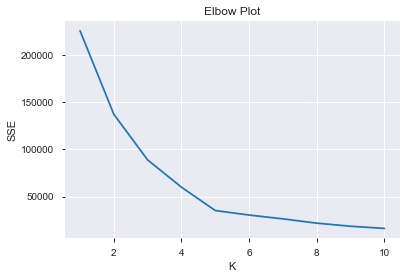

In [41]:
plt.plot(range(1,11),costs)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Plot')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [47]:
data['cluster'] = kmeans.labels_

In [48]:
data.columns

Index(['Annual Income (k)', 'Spending Score (1-100)', 'cluster'], dtype='object')

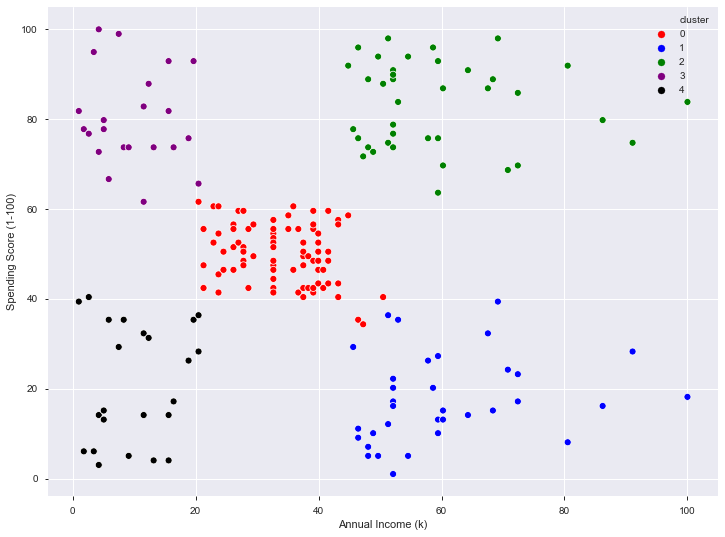

In [54]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='Annual Income (k)',y='Spending Score (1-100)', hue='cluster',data=data,
               palette = {0:'red',1:'blue',2:'green',3:'purple',4:'black'})
plt.show()

In [55]:
data[data['cluster']==0]

,Annual Income (k),Spending Score (1-100),cluster
43,20.475410,61.612245,0
46,21.286885,55.551020,0
47,21.286885,47.469388,0
48,21.286885,42.418367,0
49,21.286885,42.418367,0
...,...,...,...
121,43.196721,40.397959,0
122,44.819672,58.581633,0
126,46.442623,35.346939,0
132,47.254098,34.336735,0


In [56]:
 from sklearn.cluster import AgglomerativeClustering

In [57]:
data_2 = data.drop('cluster',axis=1)

In [59]:
cluster = AgglomerativeClustering(n_clusters=5,linkage='single')
cluster.fit(data_2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [61]:
data_2['cluster'] = cluster.labels_

In [62]:
data_2.columns

Index(['Annual Income (k)', 'Spending Score (1-100)', 'cluster'], dtype='object')

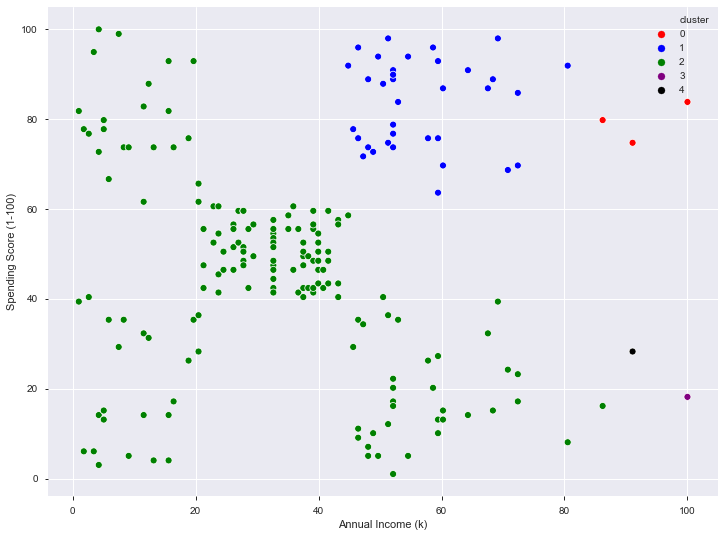

In [64]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='Annual Income (k)',y='Spending Score (1-100)', hue='cluster',data=data_2,
               palette = {0:'red',1:'blue',2:'green',3:'purple',4:'black'})
plt.show()